# Matemática Computacional I
- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufsm.br

## Soluções numéricas de equações em uma variável

Muitas situações práticas em ciências e engenharias envolvem resolver modelos matemáticos dados por uma equação em uma única variável. Em aplicações reais, dificilmente é conveniente ou mesmo possível obter soluções analítica para esses modelos, sendo necessário o uso de métodos numéricos. Um exemplo simples é apresentado a seguir.

A área do segmento $A_S$ de um círculo de raio $r$ é dada por:
$$A_S=\frac{1}{2}r^2(\theta-sen\theta)$$


Para se determinar o ângulo $\theta$ se $A_S$ e $r$ são conhecidos, a equação deve ser resolvida para $\theta$. Obviamente, não é possível escrever $\theta$ explicitamente em termos de $A_S$ e $r$, portanto, a equação não pode ser resolvida analiticamente


Em eletricidade, por exemplo, para calcular a corrente $i$ em um circuito composto de uma fonte de energia ($V$) e uma resistência ($R$), usa-se a Lei de Kirchoff $V - Ri = 0$ e a corrente será dada por $i=V/R$. Mas se o circuito incluir um diodo semicondutor, a equação fica

$$ V-Ri-\frac{kT}{q}ln\left( \frac{i}{I_s}+1 \right) = 0$$

onde $k$ e $I_s$ são constantes, $q$ é a carga do elétron e $T$ a temperatura do dispositivo. Nesse caso a corrente não pode ser obtida tão facilmente por métodos analíticos, ou seja, "isolando o $i$". Nesse caso podemos fazer uso de métodos computacionais.

Um outro exemplo, em termodinâmica, é a relação entre o calor $Q$ fornecido a um gás e sua variação de temperatura $T_f - T_i$, que sob determinadas condições,  é dada por

$$ Q = nR \left[ A (T_f-T_i)+ \frac{B}{2}(T_f^2-T_i^2) + \frac{C}{3}(T_f^3-T_i^3) \right].$$

Em que $R$, $A$, $B$ e $C$ são constantes conhecidas. Assim, para calcular a temperatura final $T_f$ quando determinada energia é absorvido pelo gás, sendo o volume e a temperatura conhecidos, é necessário ouso de métodos numéricos.

Podemos citar muitos outros exemplos similares, mas vamos deixar para os exemplos aplicados e exercícios no final do capítulo. O ponto aqui é que todos esses problemas podem ser resolvidos numericamente por métodos de zeros de funções, como será visto a seguir.

A raiz, ou zero de uma função $f(x)$  é o número $\overline{x}$ tal que $f(\overline{x})=0$. Como sabemos, nem sempre é possível resolver uma equação de forma exata, ou analítica, nesses casos fazemos uso de métodos numéricos.

Uma equação em uma variável real, sempre pode ser escrita na forma

$$f(x)=0$$

na qual $x$ é a variável independente e  $y = f(x)$ é a variável dependente. Assim, a resolução da equação em uma variável pode ser abordada como um problema de zero de funções.

Graficamente, um zero (ou raiz) é o ponto onde a função $f(x)$ cruza ou toca o eixo $x$. Uma equação $f(x)=0$ pode não ter raiz real, ter uma única raiz ou várias.

### Método da bissecção

Métodos numéricos, em geral, fornecem uma sequência de aproximações, por meio de um processo iterativo a partir de uma aproximação inicial $x_0$. O processo é interrompido quando a solução aproximadas atinge uma precisão pré-estabelecida.

Se os valores $x_i$, $i=0,1,2,...$ obtidos pelo processo iterativo estão se aproximando da solução exata $\overline{x}$, ou seja, $|\overline{x} -x_i| \rightarrow 0$ quando $i\rightarrow \infty$, dizemos que a sequência está convergindo. Usualmente o processo iterativo é interrompido quando o valor $\frac{|x_i - x_{i-1}|}{|x_i|} < \epsilon$ onde $\epsilon$ é a tolerância, que dá uma medida da precisão desejada.

Em geral a aplicação de um método numérico para encontrar a raiz de uma equação requer duas etapas:

1. Isolar a raiz, ou seja, encontrar um intervalo $[a,b]$ contendo uma única raíz da equação e;

2. Refinar o intervalo que contém a raíz até atingir a precisão desejada.



Para isolar os zeros de uma função, podemos utilizar algum método gráfico ou testar valores numericamente. Para o método gráfico podemos rescrever a equação $f(x)=0$ numa forma equivamente $f_1(x)=f_2(x)$ e traçar os gráficos de $f_1$ e $f_2$ para verificar onde eles se interceptam. Para testar valores numericamente, basta atribuir valores arbitrários para a variável $x$ e encontrar um par $a$ e $b$ tal que $f(a)\cdot f(b)<0$, mas isso não garante que a raiz seja única em nesse intervalo.

**Exemplo 1** 

O gráfico da equação $f(x)=e^x-sen(x)-2=0$ nos permite inferir que existe uma única raiz entre $0.5$ e $1.5$.

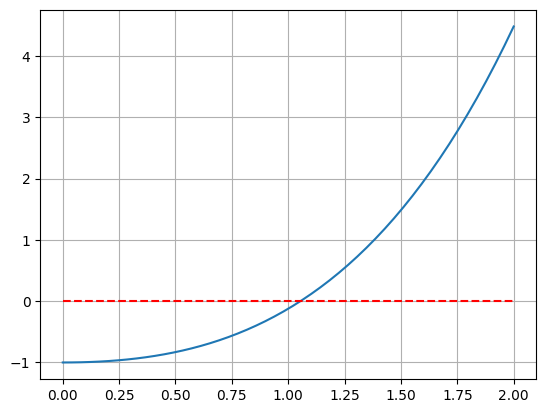

In [1]:
MTIM_02_atividade_avaliativaimport matplotlib.pyplot as plt
import numpy as np

xi = np.linspace(0,2)
f = lambda x: np.exp(x) - np.sin(x) - 2

plt.plot(xi,f(xi))
plt.plot(xi, [0]*len(xi), 'r--')
plt.grid()

Testando alguns valores numericamente podemos verificar que a raiz está entre $1,0$ e $1,1$, pois $f(1,0) f(1,1) <0$ como mostra a sequência abaixo

In [2]:
import numpy as np
x = np.linspace(0.5, 1.5, 11)
y = np.exp(x)-np.sin(x)-2
for i in range(11):
    print(f'f({x[i]:.1f})={y[i]:.4f}')

f(0.5)=-0.8307
f(0.6)=-0.7425
f(0.7)=-0.6305
f(0.8)=-0.4918
f(0.9)=-0.3237
f(1.0)=-0.1232
f(1.1)=0.1130
f(1.2)=0.3881
f(1.3)=0.7057
f(1.4)=1.0698
f(1.5)=1.4842


Então poderíamos assumir que o ponto médio do intervalo, ou seja $x=1.05$ é uma solução aproximada para essa equação. De fato $f(1.05)\approx-0.00977$ que é relativamente próximo de $0$. Tem-se pelo menos duas casas de precisão.

### Método da Bisseção

O _Método da Bisseção_ é o método numérico para resolução de equações do tipo $f(x)=0$, no qual, a partir de um intervalo inicial $[a,b]$ contendo uma única raiz, é gerada uma sequência convergente de aproximações para a raiz. Cada aproximação é obtida dividindo-se intervalo que contém a raiz em dois subintervalos de mesma amplitude. A cada passo, é verificado em qual dos dois subintervalos obtidos contém a raiz e esse é tomado como o intervalo para a próxima iteração. Para verificar o intervalo que contém a raiz, é utilizando o teorema de Bolzano (ou Teorema do Valor Intermediário).

**Teorema de Bolzano:** Se $f(x)$ é contínua em $[a,b]$ e $f(a)\cdot f(b)<0$, então, existe $\overline{x}$, tal que $a<\overline{x}<b$ e $f(\overline{x})=0$.



A figura 4.2 abaixo ilustra uma situação em que existe uma única raiz no intervalo $[a,b]$.

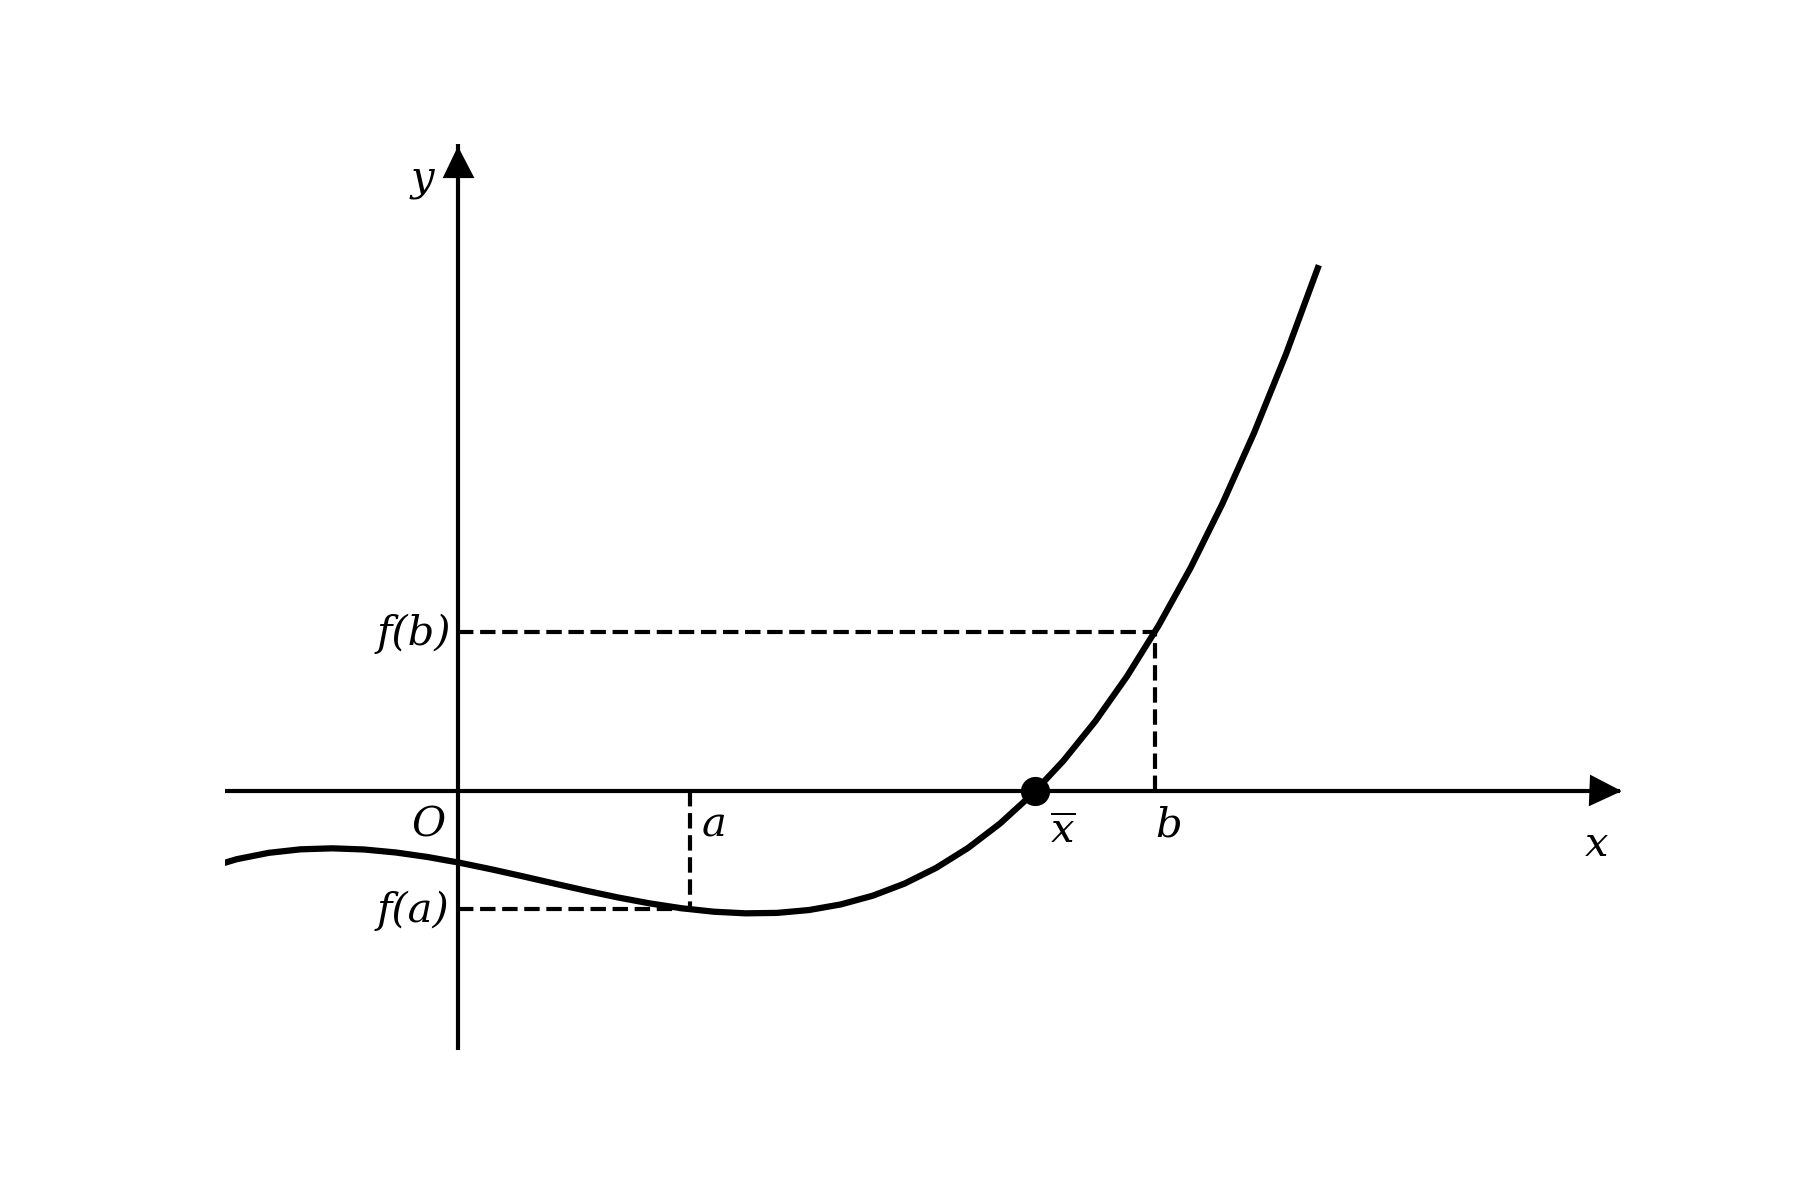

A sequência de subintervalos será calculada até que a amplitude do intervalo obtido seja menor que uma tolerância pré-estabelecida. Assim, podemos descrever o processo no seguinte algoritmo:

1. Determinar um intervalo inicial $[a,b]$ contendo uma única raíz de $f$;

2. Calcular o ponto médio $x_m=\frac{b+a}{2}$.

3. Se $|b-a|>\epsilon$ ou $\frac{|x_i - x_{i-1}|}{|x_i|}>\epsilon$ segue, senão, assumir $\overline{x}\approx x_m$ e parar;

4. Se $f(x_m)=0$, então, a raiz $\overline{x}$ é o próprio $x_m$;

5. Se $f(a)\cdot f(x_m)<0$ fazemos $b=x_m$, senão fazemos $a=x_m$  e voltamos ao passo 2;

**Exemplo 2** 

Neste exemplo vamos usar o método da bisseção para  encontrar a raiz da equação $x^2+ln(x)-2=0$  com precisão de $\epsilon = 10^{-3}$.

*Solução:* 


Reescrevendo a equação como $x^2-2=-ln(x)$ e plotando os gráficos de $f_1(x)=x^2-2$ e $f_2(x)=-ln(x)$ observamos que existe uma raiz no intervalo $[1.25,1.50]$. A raiz é a abcissa do ponto de intersecção das duas curvas.

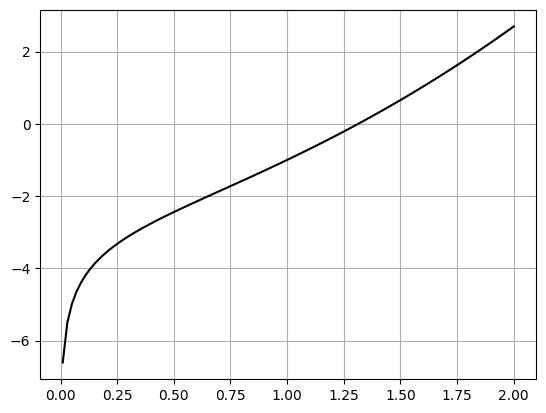

In [3]:
f1 = lambda x: x**2 + np.log(x) - 2

x = np.linspace(0.01, 2, 100)
plt.plot(x, f1(x), color="black")
plt.grid()

Então, na primeira iteração fazemos

$$x_0 = \frac{a+b}{2}=\frac{1.25+1.5}{2}=1.375$$

Como $f(a)=f(1.25)=-0.2144$, $f(b)=f(1.5)=0.2091$ e $f(x_0)=f(1.375)=0.2091$ temos que a raiz está no intervalo $[a,x_0]$. Então seguimos o processo iterativo obtendo a próxima iteração

$$x_1 = \frac{a+x_0}{2}=\frac{1.25+1.375}{2}=1.3125$$

e obtemos que a raiz está no intervalo $[1.3125, 1.3750]$, pois
$f(1.3125)=-0.0054$ portanto $f(1.3125)f(1.3750)<0$. Além disso, $\frac{|x_1-x_0|}{|x_0|}=0.0398$ é maior que $\epsilon = 0.001$. Então seguimos o processo iterativo.


**Exercício 1**

Vamos construir um algoritmo em python que calcule a raiz de uma função a partir de um intervalo dado, usando o método da bisseção.

Considere o seguinte algoritmo:

- 1. Defina o intervalo inicial [a,b], a função a qual queira se encontrar a raiz e a tolerancia;
- 2. Calcule o ponto medio do intervalo;
- 3. Veja se o erro relativo entre a estimativa do passo 2 e o valor da iteração anterior é menor que a tolerancia;
- 4. Calcule se f(a).f(xm) < 0 ou nao, e renomeie os extremos do intervalo.

Aplique o algoritmo desenvolvido no exemplo 2.

**Exercício 2:** 

Calcule, pelo método da bisseção, corretamente até a terceira casa decimal, a solução da equação  $\left( \frac{x}{2} \right)^2-sen(x) = 0$, localizada no intervalo ($a_0=1$ e $b_0=3$).

### Método do ponto fixo

O método do ponto fixo (ou das aproximações sucessivas), consiste em reescrever a equação $f(x)=0 $ em uma equação equivalente $x = \phi (x)$ em que $\phi (x)$ é a de iteração. Então, a raiz $\overline{x}$ é obtida por meio de uma sequência de de soluções aproximadas, geradas pelo processo iterativo dado por

$$ x_{i+1} = \phi(x_i) , \,\,\,\,\, i = 0,1,2,...$$

Existem muitas formas diferentes de se obter a função de iteração, como é exemplificado a seguir.

Por exemplo, a equação $f(x) = x^2-5x=0$, então, algumas possíveis funções de iteração são

(a) $x_{i+1} = \phi(x_i) = \sqrt{5x_i}$

(b) $x_{i+1} = \phi(x_i) = \frac{x_i^2}{5}$

(c) $x_{i+1} = \phi(x_i) = x^2 - 4$

Por exemplo, a equação $f(x) = x^3-x-7=0$, então, algumas possíveis funções de iteração são:

(a) $x_{i+1} = \phi(x_i) = x_{i}^3-7$

(b) $x_{i+1} = \phi(x_i) = \sqrt[3]{x+7}$

(c) $x_{i+1} = \phi(x_i) = 7/(x^2-1)$

De modo geral, sempre é possível obter uma função de iteração multiplicando uma função qualquer $\theta(x)$ pela equação $f(x)=0$ e somando $x$ a ambos os lados obtendo-se

$$x_{i+1} = \phi(x_i) = f(x)\theta(x_i)+x$$

O processo iterativo gera uma sequência de soluções aproximadas a partir de uma aproximação inicial $x_0$, como é mostrado abaixo

$$x_{1} = \phi(x_0)$$

$$x_{2} = \phi(x_1)$$

$$x_{3} = \phi(x_2)$$

$$\vdots$$

$$x_{i+1} = \phi(x_{i})\simeq \overline{x}$$

Geometricamente, interpretamos o processo iterativo como é mostrado nas figuras abaixo, para dois casos distintos. O ponto de intersecção entre o gráfico de $\phi(x)$ e a reta $y=x$ é o ponto cuja abcissa é a raiz procurada $\overline{x}$.

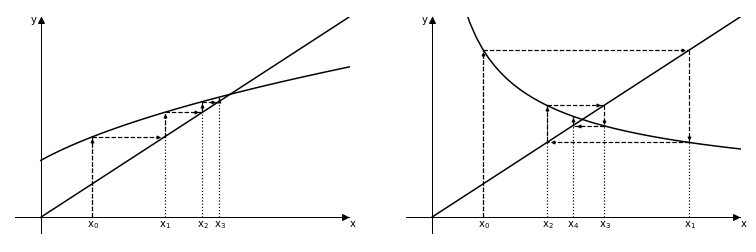



**Exemplo 3** 

Vamos usar o método do ponto fixo para encontrar uma raiz para $f(x)=x-cos(x/2)$ com $\epsilon = 10^{-3}$.

Aqui a forma mais obvia de reescrevermos a equação de modo a termos $x = \phi (x)$ é fazer $x=cos(x/2)$ o que nos fornece o processo iterativo $x_{i+1}=cos(x/2)_i$. Vamos então buscar uma boa aproximação inicial $x_0$ e avaliar a convergência. Começamos olhando os gráficos e $f_1(x)=x$ e $f_ 2(x)=cos(x/2)$.

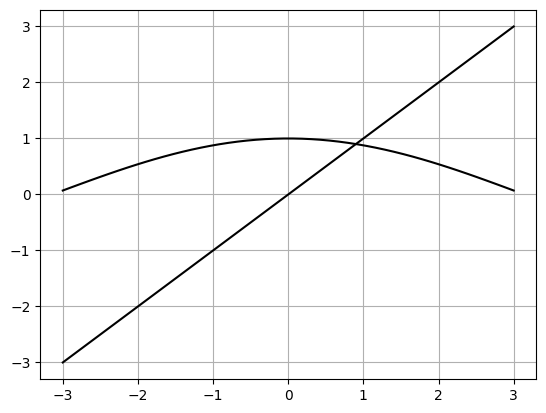

In [4]:
f1 = lambda x: np.cos(x/2)
f2 = lambda x: x
X = np.linspace(-3, 3)
plt.plot(X, f1(X),X, f2(X),
        color = "black")
plt.grid()
plt.show()

Observamos que existe uma única raiz entre $0$ e $1$, tomamos então o ponto médio $x_0=0,5$ como aproximação inicial. Avaliando a função $|\phi'(x)|= |-\frac{sen(x/2)}{2}|$ em torno de $x_0=0,5$ também verificamos que $|-\frac{sen(x/2)}{2}|<1$, logo, o processo iterativo é convergente. Então, fazendo algumas iterações até que a diferença relativa $\frac{|x_i - x_{i-1}|}{|x_i|}$ atinja um valor menor que 0.001 obtemos:

In [5]:
phi   = lambda x: np.cos(x/2)
err   = 1.0
x_ant = 0.5

while err > 0.001:
    x = phi(x_ant)
    err = abs(x-x_ant)/abs(x)
    x_ant = x
    print (f' x = {x}, erro = {err}')

 x = 0.9689124217106447, erro = 0.48395748800780714
 x = 0.8849283373389375, erro = 0.09490495538232536
 x = 0.903699330715045, erro = 0.020771281706333838
 x = 0.8996410217990137, erro = 0.004511031419972279
 x = 0.9005251594201672, erro = 0.0009818022427299535


Vamos, dessa vez, construir uma função para o método do ponto fixo

In [6]:
def pontofixo(phi,x,eps):
    err = 10.0
    x_ant = x

    while err>eps:
        x = phi(x)
        err = abs(x-x_ant)/abs(x)
        x_ant = x
        print ("| x=%.9f"%x, "| err=%.9f"%err)
    return (x)

A função `pontofixo` recebe a função de iteração, a aproximação iniciao e a precisão desejada e processa as iterações imprimindo os resultados até que a tolerância seja atingida. A seguir é executada para $f(x)=ln(x)+2$, $x_0=3$ e $\epsilon=0.0001$:

In [7]:
pontofixo(lambda x: np.log(x)+2, 3.0, 0.0001)

| x=3.098612289 | err=0.031824662
| x=3.130954362 | err=0.010329781
| x=3.141337866 | err=0.003305440
| x=3.144648781 | err=0.001052873
| x=3.145702209 | err=0.000334878
| x=3.146037143 | err=0.000106462
| x=3.146143611 | err=0.000033841


3.1461436109912895

**Exercício 3**

Calcule, se possível, as raízes das seguintes funções com pelo menos 3 casas de precisão, usando o método do ponto fixo:

a) $f(x) = \sqrt{x}-5^{-x}$

b) $f(x) = e^{x} + x$

c) $f(x) = xln(x)-1$